In [127]:
import cv2
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
import math

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            cv2.circle(vis, (int(x), int(y)), 2, color)

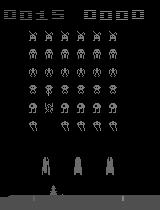

In [194]:
invaders = cv2.imread('dqn/frame_ep_0_t_100.png')
showarray(invaders_gray)

In [142]:
def read_averaged_template(path_a, path_b):
    a = cv2.imread(path_a, 0)
    b = cv2.imread(path_b, 0)
    
    avg = cv2.addWeighted(a,0.5,b,0.5,0)
    
    return a

template_path = 'dqn/space_invader_sprites/enemy_{}_{}.png'

templates = {
    'enemy_0' : read_averaged_template(template_path.format(0, 'a'), template_path.format(0, 'b')),
    'enemy_1' : read_averaged_template(template_path.format(1, 'a'), template_path.format(1, 'b')),
    'enemy_2' : read_averaged_template(template_path.format(2, 'a'), template_path.format(2, 'b')),
    'enemy_3' : read_averaged_template(template_path.format(3, 'a'), template_path.format(3, 'b')),
    'enemy_4' : read_averaged_template(template_path.format(4, 'a'), template_path.format(4, 'b')),
    'enemy_5' : read_averaged_template(template_path.format(5, 'a'), template_path.format(5, 'b')),
    'self' : cv2.imread('dqn/space_invader_sprites/my_sprite.png', 0),
    'defense' : cv2.imread('dqn/space_invader_sprites/defense.png', 0),
}

In [192]:
def tile(coords, grid):
    new_y = np.floor(coords[0] / grid[0]).astype(np.int)
    new_x = np.floor(coords[1] / grid[1]).astype(np.int)
        
    return new_y, new_x

def location_features(template, observation, grid, threshold=0.8):
    
    assert type(grid) == type(np.array([0])), type(grid)
    assert observation.shape[0] % grid[0] == 0
    assert observation.shape[1] % grid[1] == 0

    result = cv2.matchTemplate(observation, template, cv2.TM_CCORR_NORMED)
    loc = np.where(result > threshold)
    tiled = tile(loc, grid=grid)
    
    _new_shape = np.divide(observation.shape, grid).astype(np.int)
    _zeros = np.zeros(_new_shape)
    _zeros[tiled] = 1
    flat = _zeros.flatten()
    
    return flat

def extract_features(observation, grid=np.array((5,5))):
    
    gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)

    locs = []
    for k, v in templates.items():
        if 'enemy' not in k:
            continue

        _features = location_features(v, gray, grid=grid)
        locs.append(_features)

    _self = location_features(templates['self'], gray, grid=grid)
    locs.append(_self)
    
    locs = np.concatenate(locs)
    
    return locs

feats = extract_features(invaders)
len(feats)

9408

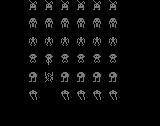

In [126]:
sub_image = invaders_gray[31:157, :] # ---> aliens
# sub_image = invaders_gray[156:156+20, :] # ---> defenses
# sub_image = invaders_gray[185:195,:] # ---> self
showarray(sub_image)

res = cv2.matchTemplate(sub_image, template,cv2.TM_CCOEFF_NORMED)

In [122]:
res[np.where(res > 0.7)]
np.where(res > 0.7)

(array([5]), array([49]))